In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
print("Pandas version:", pd.__version__)


Pandas version: 2.3.2


In [2]:
# Load dataset (seaborn version)
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:

print(titanic.shape)
print(titanic.info())

# Missing values
print(titanic.isnull().sum())

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0
age    

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


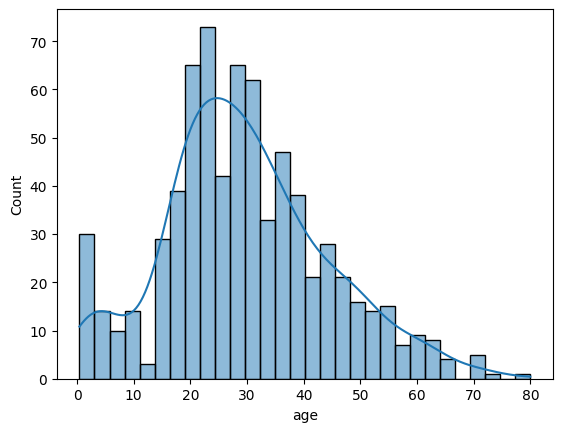

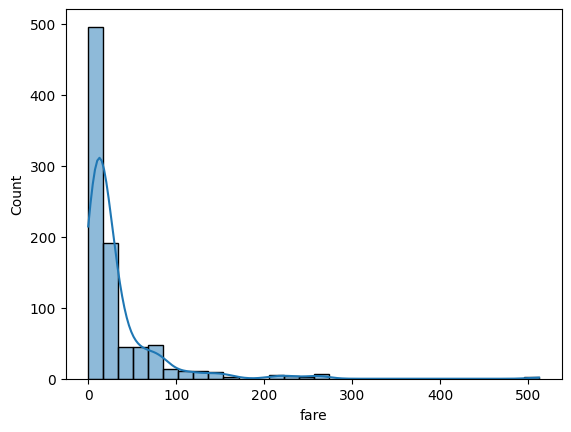

In [5]:
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(titanic['age'], bins=30, kde=True)
plt.show()

# Fare distribution
sns.histplot(titanic['fare'], bins=30, kde=True)
plt.show()

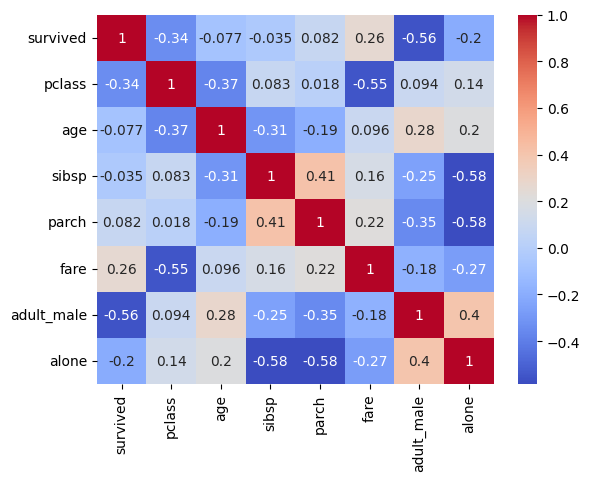

In [6]:
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


/tmp/ipykernel_4661/1460003176.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby("class")["survived"].mean())


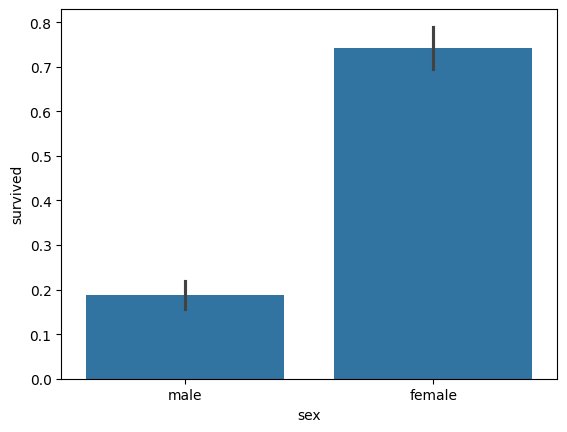

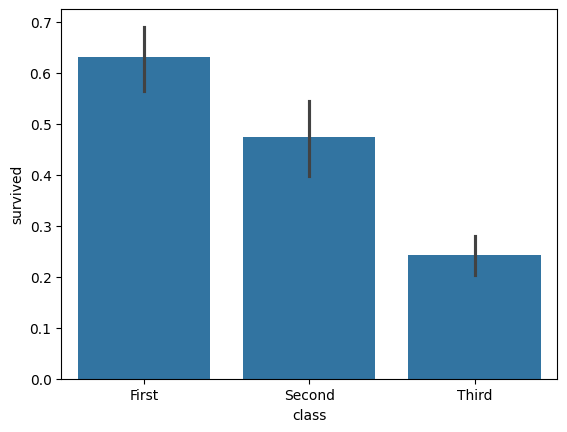

In [7]:
# Survival by sex
print(titanic.groupby("sex")["survived"].mean())

# Survival by class
print(titanic.groupby("class")["survived"].mean())

# Visualization
sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

sns.barplot(x="class", y="survived", data=titanic)
plt.show()

In [8]:

titanic.tail(10)   # last 10 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
titanic.head(10)   # first 10 rows


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Drop 'deck' if it exists (ignore otherwise)
titanic = titanic.drop(columns=["deck"], errors="ignore")

# Fill 'age' with median (robust against outliers)
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# Fill 'embark_town' with mode (most common value)
titanic["embark_town"] = titanic["embark_town"].fillna(titanic["embark_town"].mode()[0])

# Double check again
print(titanic.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [12]:
titanic = pd.get_dummies(titanic, columns=["embark_town"], drop_first=True)
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True,False,True


In [13]:
titanic["fare"].fillna(titanic["fare"].median(), inplace=True)


/tmp/ipykernel_4661/3025609011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["fare"].fillna(titanic["fare"].median(), inplace=True)


In [14]:
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male alive  alone  embark_town_Queenstown  \
0    man        True    no  False                   False   
1  woman       False   yes  False                   False   
2  woman       False   yes   True                   False   
3  woman       False   yes  False                   False   
4    man        True    no   True                   False   

   embark_town_Southampton  
0                     True  
1                    False  
2                     True  
3                     True  
4                     True  


In [15]:
titanic_clean = titanic.drop(
["alive", "embark_town_Queenstown", "embark_town_Southampton", "embarked_Q", "embarked_S"],
    axis=1,errors="ignore")

In [16]:
print(titanic_clean.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  alone  
0    man        True  False  
1  woman       False  False  
2  woman       False   True  
3  woman       False  False  
4    man        True   True  


In [17]:
titanic_clean = titanic.drop(["parch"], axis=1)

In [18]:
titanic_clean["age"] = titanic_clean["age"].fillna(titanic_clean["age"].median())


In [19]:
categorical_cols = ["sex", "embarked", "class", "who", "adult_male", "alone"]
numeric_cols = [ "pclass","age", "sibsp", "parch", "fare"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

In [22]:
X = titanic.drop("survived", axis=1)  
y = titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (712, 14)
X_test shape: (179, 14)


In [24]:
from sklearn.impute import SimpleImputer

# Numeric preprocessing: impute missing values + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing: impute missing values + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Update column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [25]:
# 1. IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Update column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 2. DEFINE PIPELINE
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 3. FIT MODEL
clf.fit(X_train, y_train)

# 4. ACCURACY
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

# 5. PREDICTIONS + METRICS
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# 2. DEFINE PIPELINE
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 3. FIT MODEL
clf.fit(X_train, y_train)

# 4. ACCURACY
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

# 5. PREDICTIONS + METRICS
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Train Accuracy: 0.8286516853932584
Test Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Train Accuracy: 0.8286516853932584
Test Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

